<a href="https://colab.research.google.com/github/0jipy/192kbps_colab_JIPY/blob/main/01_ThoracicSurgery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 폐병 환자 수술(Thoracic Surgery)

In [ ]:
# 파일 업로드
from google.colab import files
uploaded = files.upload()

Saving ThoracicSurgery.csv to ThoracicSurgery.csv


https://cheris8.github.io/artificial%20intelligence/DL-Keras-Loss-Function/

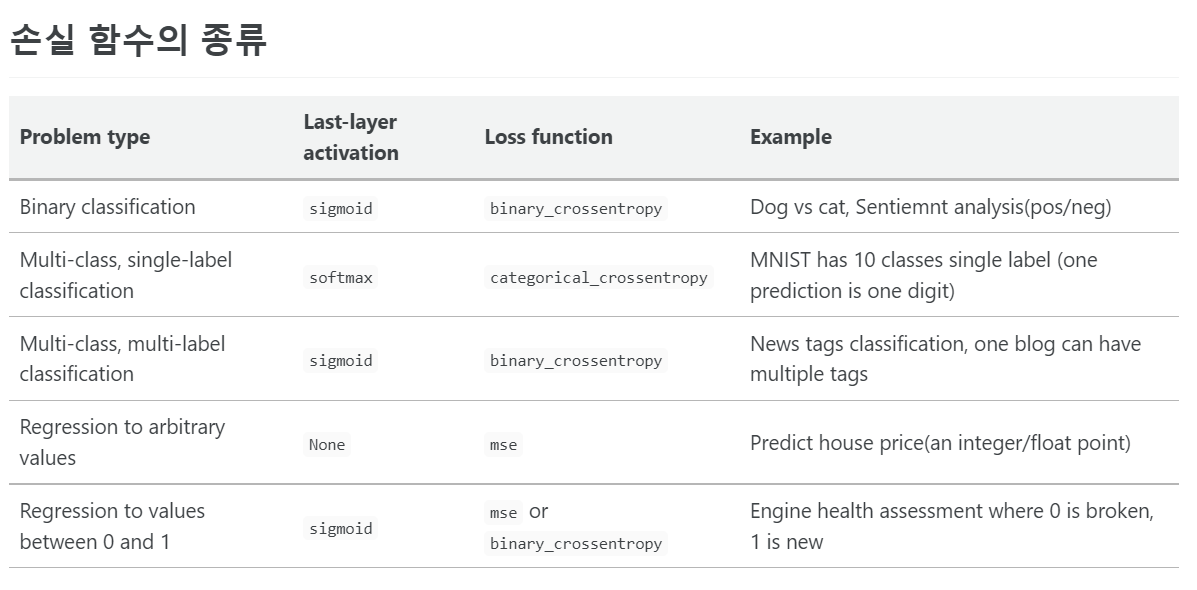



In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# uploaded.keys()
list(uploaded.keys())[0]

'ThoracicSurgery.csv'

In [ ]:
# filename = 'ThoraricSurgery.csv'
filename = list(uploaded.keys())[0]

In [ ]:
df= pd.read_csv(filename, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0


- Train/Test dataset 분리

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.values[:,:-1], df.values[:,-1], stratify=df.values[:,-1], random_state=2022
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((352, 17), (118, 17), (352,), (118,))

- Random값 정리 

In [ ]:
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

- 모델정의

In [ ]:
#골때리네 tf 로 놨는데. tf. 이 아니라는게
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(30, input_dim=17, activation='relu'))             # 은닉층(Hidden Layer)
# 전달할때 사용하는 함수를 렐루로 하겠다. 음수는 제로 양수는 y=x가 되는 렐루
model.add(Dense(1, activation='sigmoid'))                         # 출력층(Output layer)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                540       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 위 보고는 내가 신경망 모델을 만들때 필요한 파라메터가 571개라는 내용
# 571개 껌. 백만개 넘어야. 

- 모델 실행환경 설정

In [ ]:
# 옵티마이저, 로스, 메트릭스 3가지 지정해 줘야해 
# 아래모델이 기본값일 정도로 자주사용되는 것. 

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

-  옵티마이저란 회귀배울때 경사하강. 바닥을 찾는 방법에 대해 이야기 했어 .그러나 실제적으로는 이차식으로 나오는 것이 아니야 . 오가 차함수가 RMSE일때는 이차식이라 맞을 수 있는데. 오차함수가 꼭 이차식(그러니까 우리가 단순생각하는 2차식의 미분법은 아니야. .선생님 자료 뒤쪽 경사하강의 입체적인 그림으로 보면 이해가 될듯)

- 모델학습  
validation_split=0.2  : 훈련셋의 20퍼를 테스트셋으로
epochs : 학습횟수  
batch_size : 한번 학습에 사용할 데이터 수 수량설정의 장단이 있다 

학습을 하겠다는 웨이트 값을 갱신을 하겠다. 그 후 20퍼센트 가지고 검증을 하겠다. 

In [ ]:
model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs = 30,
    batch_size=30
)

Epoch 1/30
10/10 [==============================] - 1s 23ms/step - loss: 42.6976 - accuracy: 0.1957 - val_loss: 43.9042 - val_accuracy: 0.2817
Epoch 2/30
10/10 [==============================] - 0s 4ms/step - loss: 34.1635 - accuracy: 0.2740 - val_loss: 35.1561 - val_accuracy: 0.3521
Epoch 3/30
10/10 [==============================] - 0s 4ms/step - loss: 26.6377 - accuracy: 0.3737 - val_loss: 27.0327 - val_accuracy: 0.2958
Epoch 4/30
10/10 [==============================] - 0s 4ms/step - loss: 19.1766 - accuracy: 0.3950 - val_loss: 19.6114 - val_accuracy: 0.3662
Epoch 5/30
10/10 [==============================] - 0s 4ms/step - loss: 12.9497 - accuracy: 0.4377 - val_loss: 12.6753 - val_accuracy: 0.3944
Epoch 6/30
10/10 [==============================] - 0s 4ms/step - loss: 7.6402 - accuracy: 0.5125 - val_loss: 7.0563 - val_accuracy: 0.4648
Epoch 7/30
10/10 [==============================] - 0s 4ms/step - loss: 4.1543 - accuracy: 0.6406 - val_loss: 3.5474 - val_accuracy: 0.5775
Epoch 8/3

- 정확도 평가 (학습 끝난후)

In [ ]:
model.evaluate(X_test, y_test)
# 앞의 숫자는 로스값, 뒤의 값이 어큐러시. 

4/4 [==============================] - 0s 3ms/step - loss: 0.4375 - accuracy: 0.8305


[0.4375133514404297, 0.8305084705352783]

- Machine learning - RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=2022)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.8389830508474576